#Predição de Preços de Casas - EDA

##Entendimento de negócio

Prever preços de casas baseadas em suas características é uma tarefa que pode ajudar tanto corretores na definição do valor de um imóvel praticado em uma região, quanto compradores que tenham interesse em determinado imóvel.

Nesta sentido, se executurá uma Análise Exploratória através dataset House Price Predicton com dados do censo da Califórnia e possui atributos como:

*   População
*   Renda Média dos moradores
*   Preço Médio das Casas
*   Localização (latitude e longitude)
*   Tempo de construção da casa
*   Total de quartos
*   Total de pessoas que residem em um bloco
*   Número total de famílias
*   Distância do oceano


Vale ressaltar que as medidas de latitude e longitude ajudam a delimitar os quarteirões e os valores dos outros atributos consideram valores em bloco, ou seja um conjunto de casas (apartamentos)

Fonte: https://www.kaggle.com/camnugent/california-housing-prices


##Análise Exploratória

In [ ]:
#!pip install pandas-profiling
#!pip install --upgrade pandas-profiling

Importar as bibliotecas

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Carregar os dados

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

Primeiras linhas

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Últimas linhas

In [ ]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


Número de linhas e colunas

In [ ]:
print("Número de observações:", df.shape[0])
print("Número de atributos:", df.shape[1])

Número de observações: 20640
Número de atributos: 10


Tipo de dados das colunas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Quantidade de Campos Númericos e Categóricos

In [ ]:
df.dtypes.value_counts()

float64    9
object     1
dtype: int64

Resumo de estatístico

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


* **count** = número de elementos (linhas) existente no banco de dados
* **mean** = média dos valores na coluna
* **std** = desvio padrão dos dados presentes na coluna
* **min** = menor valor existente na coluna
* **25%** = primeiro quartil dos dados (25%)
* **50%** = segundo quartil dos dados (50%)
* **75%** = terceiro quartil dos dados (75%)
* **max** = valor máximo existente na coluna 

Uma forma de vizualizar o resumo estatístico para atributos categóricos é utilzando o parâmentro include='object'

In [ ]:
df.describe(include='object')

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


Quantidade de valores nulos

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
print("Valores Nulos em %: {:.2f}" .format(df.total_bedrooms.isna().sum() * 100 / len(df)))

Valores Nulos em %: 1.00


Quantidade de linhas duplicadas

In [ ]:
df.duplicated().sum()

0

Verificando possíveis outliers nos dados através do boxplot

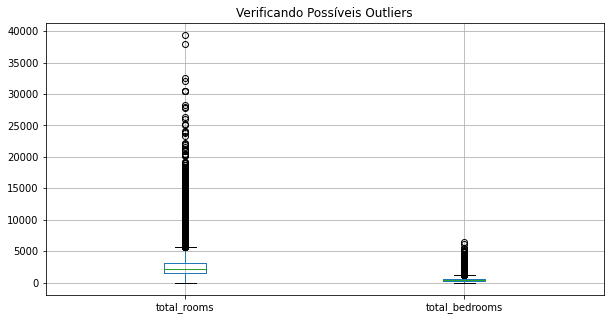

In [ ]:
# Exemplo do uso do Diagrama de Caixa dos atributos total_rooms e total_bed_rooms
df.boxplot(column= [df.columns[3], df.columns[4]], figsize=(10,5))
plt.title('Verificando Possíveis Outliers')
plt.show()

Verificando possíveis outliers nos dados utilizando o Z-Score.

In [ ]:
#Z-score
#Calculando o z-score para o atributo median_house_value
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df['median_house_value'].values))
threshold = 2
result=np.where(z > threshold)

df.iloc[result[0]]
#print(z)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


###Atributos

**Correlação entre atributos**

Uma boa forma de entender a correlação existente entre os atributos é pela construção de uma matriz de correlação

In [ ]:
matrix_corr = df.corr()
matrix_corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Matriz de correlação de forma gráfica pelo mapa de calor

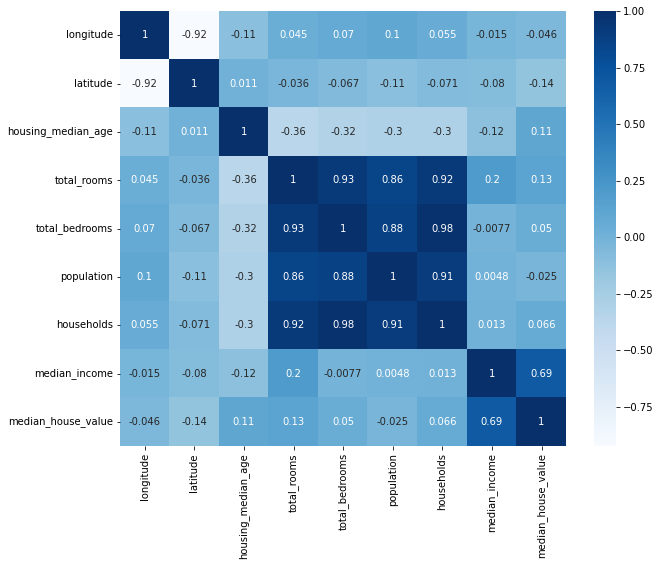

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True,cmap="Blues")
plt.show()

Como era de se esperar os atributos com uma maior correlação é o median_income e o median_house_value, de forma que se pode deduzir que quanto maior a renda maior será o valor do imóvel de determinado grupo.

O gráfico de dispersão abaixo mostra gráficamente a correlação entre estes dois atributos:

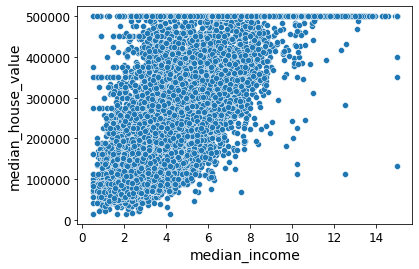

In [ ]:
#Pelo Mathplotlib
#df.plot(kind= 'scatter', x= 'median_income', y='median_house_value')
#plt.show()

#Pelo Seaborn
sns.scatterplot(x=df.median_income, y=df.median_house_value)
plt.show()

In [ ]:
#Resumo estatístico do atributo median_house_value
df.median_house_value.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

**median_house_value**

In [ ]:
print("Valores distintos:     ",df.median_house_value.nunique())
print("Valores distintos (%): ",round(df.median_house_value.nunique() * 100 / len(df), 2))
print("Valor médio:           ",round(df.median_house_value.mean(),2))

Valores distintos:      3842
Valores distintos (%):  18.61
Valor médio:            206855.82


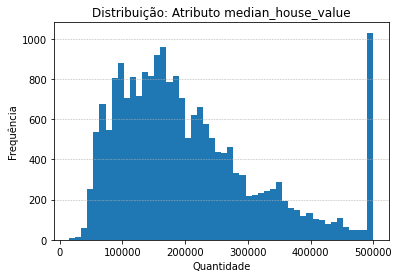

In [ ]:
#Plot do histograma para entender a distribuição dos valores do atributo median_house_value
df.median_house_value.plot.hist(bins=50)
plt.title('Distribuição: Atributo median_house_value')
plt.xlabel('Quantidade');
plt.ylabel('Frequência');
plt.grid(axis='y', linestyle='--',linewidth = 0.5)
plt.show()

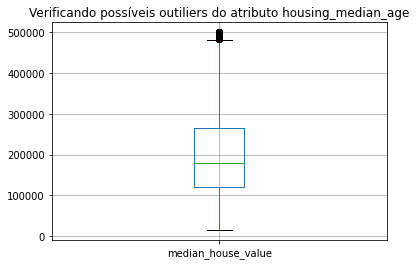

In [ ]:
#Plot do diagrama de caixa na busca de outliers do atributo housing_median_age
df.boxplot(column=['median_house_value'])
plt.title('Verificando possíveis outiliers do atributo housing_median_age')
plt.show()

In [ ]:
#Quantidade de imóveis com o valor médio de 500001.0
df.median_house_value[df.median_house_value == 500001.0].count()

965

Obs.: A partir do histrograma, diagrama de caixa e contagem de imóveis com o valor máximo se observou que os valores dos imóveis com maiores valores foram todos 'tabelados' com o mesmo valor, 500001.0, o que mesmo atipico, devido a quantidade valores não apresenta com outliers

In [ ]:
#Resumo Estatístico
df.housing_median_age.describe()

count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

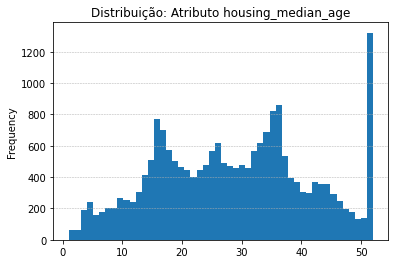

In [ ]:
#Plot do histograma para entender a distribuição dos valores do atributo housing_median_age
df.housing_median_age.plot.hist(bins=50)
plt.title('Distribuição: Atributo housing_median_age')
plt.grid(axis='y', linestyle='--',linewidth = 0.5)
plt.show()

In [ ]:
#Quantidade de imóveis com o tempo médio de construção igual a 52.0
df.housing_median_age[df.housing_median_age == 52.0].count()

1273

O pico de valores no final do histograma do atributo housing_mediam_age é semelhante ao encontrado no histograma do atributo mediam_house_value, todavia, não representa outliers pois há 1273 com o valor 52.0

Como forma de ilustrar a semelhança segue o plot dos dois histogramas:

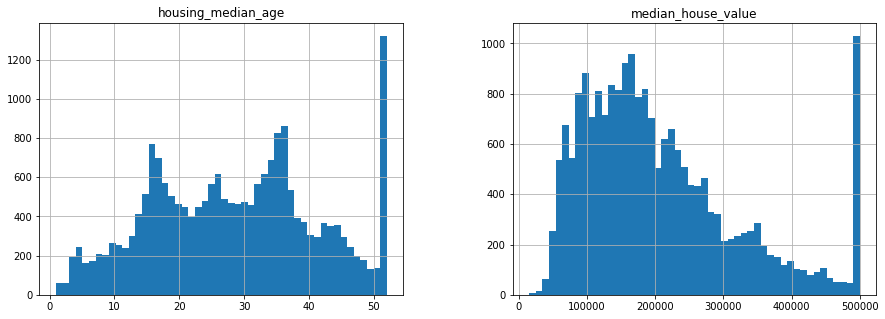

In [ ]:
df[['housing_median_age', 'median_house_value']].hist(bins= 50, figsize = (15,5))
plt.show()

Verificar a distribuição dos imovéis de maior valor em relação a distância do mar

In [ ]:
df.ocean_proximity[df.median_house_value == 500001.0].value_counts()

<1H OCEAN     532
NEAR OCEAN    212
NEAR BAY      194
INLAND         27
Name: ocean_proximity, dtype: int64

**ocean_proximity**

In [ ]:
#Valores únicos para a o atributo categórico ocean_proximity
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

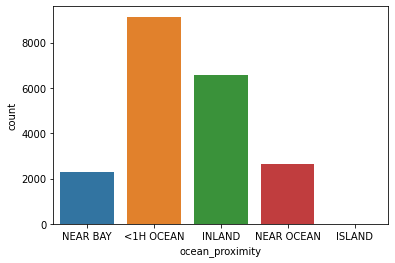

In [ ]:
sns.countplot(x=df.ocean_proximity, data=df)
plt.show()

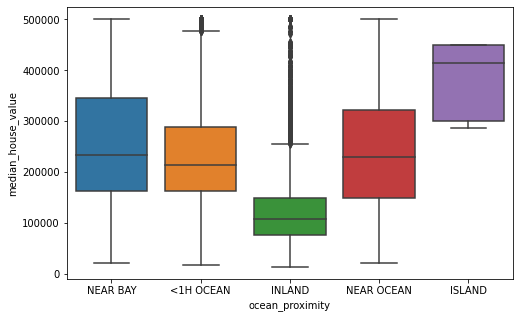

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=df.ocean_proximity,y=df.median_house_value)
plt.show()

**latitude e longitude**

Um forma de entender a distribuição dos imóveis e sua população é plotar um gráfico de dispersão cruzando os atributos latitude e longitude

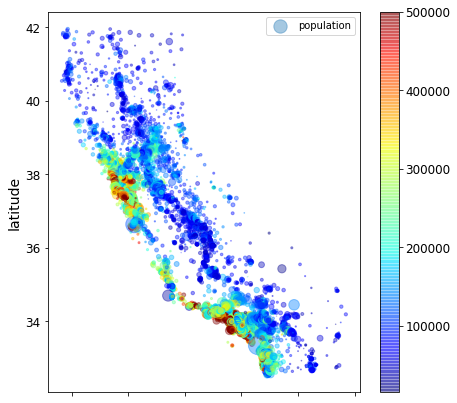

In [ ]:
df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = df["population"]/100, label = "population",
            c = df["median_house_value"], cmap = "jet", colorbar = True, figsize = (7,7))
plt.legend()
plt.show()

O resultado encontrado pelo cruzamento dos atributos e longitude no gráfico de dispersão é semelhante a sua representação sobreposta na superfície de um mapa como mostra a figura a seguir, disponível em: https://www.kaggle.com/martaba/california-housing-comments-welcome

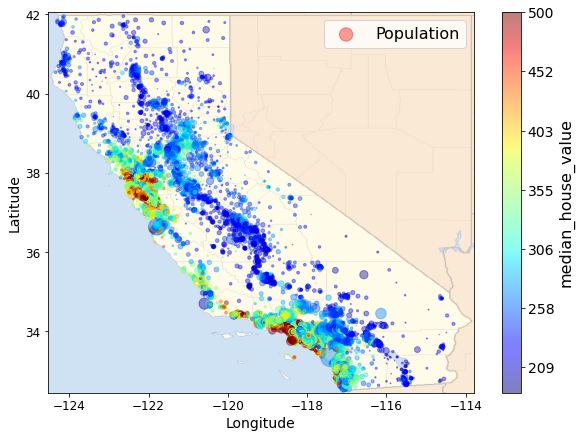

O mesmo gráfico plotado no seaborn considerando o atributo median_house_value para codificação das cores

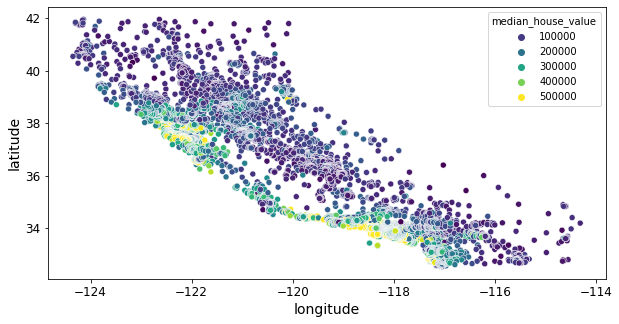

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.longitude, y=df.latitude, hue=df.median_house_value, palette='viridis')
plt.show()

##Pré processamento

A título de exemplo, segue algumas operações que envolvem transformação nos dados

In [ ]:
#duplicando dataframe para realizar o pré processamento
df2 = df

**Tratar valores nulos**

In [ ]:
#Excluir valores nulos
#df2.total_bedrooms.dropna()

In [ ]:
#Substituir valores nulos peça mediana
df2['total_bedrooms'] = df2.total_bedrooms.fillna(df2.total_bedrooms.median())

In [ ]:
#Check
df2.total_bedrooms.isna().sum()

0

**One hot enconding**

In [ ]:
df2 = pd.get_dummies(df2, columns=['ocean_proximity'])

In [ ]:
#Check
df2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
